In [16]:
import pandas as pd
plate_map = pd.read_clipboard()

In [17]:
plate_map = plate_map[[x not in ['0'] for x in plate_map['K562'].values]]

In [18]:
plate_map

,r,c,w,K562,Tcells,aLFA
13,2,2,14,37,none,0
14,2,3,15,37,none,0
15,2,4,16,37,none,0
16,2,5,17,40,none,0
17,2,6,18,40,none,0
18,2,7,19,40,none,0
19,2,8,20,both,none,0
20,2,9,21,both,none,0
21,2,10,22,both,none,0
25,3,2,26,37,J,0


In [30]:
import re

def rcstr2well(rcstr,plate=96):
    import re
    parser = re.compile('([A-Pa-p])\s?-?_?\s?([0-9]{1,2})')
    parsed = parser.findall(rcstr)
    
    rowlen = {6:3,12:4,24:6,96:12,384:24}
    try:
        r = rch2num(parsed[0][0].upper())
        c = int(parsed[0][1])
        well = (r-1)*rowlen[plate]+c
        #print(r,c,well)
    except:
        print('parsing error -jkg')
        return 0
    return well


rcstr_finder = re.compile('_[A-H]\d\d_')

rcstr2well()
groupdic = {'aCD3_pos':'negative/activated','control_pos':'positive/activated'}



[('Specimen_011_B8_B08_031',
  'live cells',
  'K562',
  'negative',
  'activated',
  '')]

['Specimen_ 011_B8_B08_031']

# HISTOGRAMS

In [31]:
dfh = pd.read_clipboard()

In [32]:
len(dfh)

4096

In [41]:
import numpy as np

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        print('error too many dimensions')
        return None

    if x.size < window_len:
        print('error window len too big')
        return None


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        print("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        return None

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y



In [ ]:
bins_orig = dfh.bin.values
squishfactor = 50
newbins = [bins_orig[i] for i in range(0,len(bins_orig),squishfactor)]
dfh['newbins'] = [next((i for i,v in enumerate(newbins) if v>=x), max(bins_orig)) for x in bins_orig]
for col in ['pos_rep','neg_rep']:
    s = sum(dfh[col].values)
    dfh[col] = [x/s for x in dfh[col].values]

In [36]:
dfg = dfh.groupby('newbins').sum()

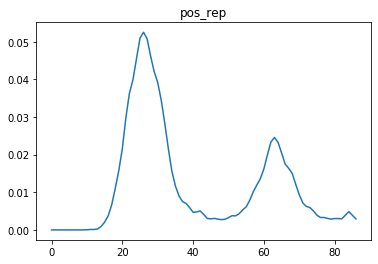

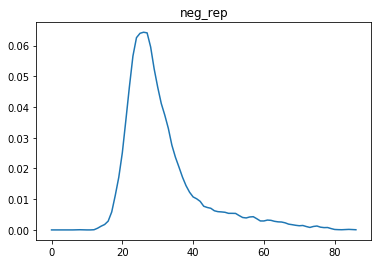

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

dfg = dfh.groupby('newbins').sum()
for col in ['pos_rep','neg_rep']:
    f,ax = plt.subplots()
    plt.plot(smooth(dfg[col].values,window_len=5))
    plt.title(col)
    plt.savefig('/Users/jkgerdts/Mirror/LAB/data/2020 08-03 IcamSynNotch Fortessa/'+col+'_FITC.pdf')